# 1D Ising model

Write a program that implements the Metropolis algorithm for single spin flips in a 1D
Ising model of $N$ spins producing a new spin configuration $X_{k+1}$ from the present spin
configuration $X_k$. Use the canonical ensemble for a heat bath of temperature $T$. Set
up periodic boundary conditions (effectively bending the chain into circle, such that the
first and the last spin are adjacent to each other). Choose units such that $J = 1$. The
thermal energy $k_B T$ is given in units of J.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
seeds = np.load("seeds_2000x100.npy")

In [2]:
#generating 100 lists 2000 seeds
#seeds = []
#for i in range(100):
#    seeds_i = np.random.randint(0, 100000, size=2000)
#    seeds.append(seeds_i)
#seeds = np.array(seeds)
#np.save("seeds_2000x100", seeds)

a) Set $N = 30$, and $k_B T = 1$ and simulate $L = 500$ individual trial spin flips. Begin
from a “cold” initial state, where all spins are pointing to the same direction. Set
the external magnetic field to $H = 0$. Visualise how the spin configuration changes
with the number of trial spin flips (i.e. with time). It might be advantageous for the
visualisation to show the configuration only after every 5th trial or so. What can
you observe? (4 points)


In [24]:
# canonical ensemble

def energy(config, H_external=0):
    J = 1
    H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]
    H_ext = H_external * np.sum(config)
    return -(J*H+H_ext)

def metropolis_algorithm(initial_state, num_trials, beta=1, H_external=0, list_seeds=None):
    sequence_states = [initial_state]
    for n in range(num_trials):
        sd = list_seeds[n]
        next = metropolis_step(sequence_states[-1], beta, H_external, seed = sd)
        sequence_states.append(next)
    return np.array(sequence_states), np.arange(num_trials+1) #sequences and corresponding time steps

def metropolis_step(current_state, beta, H_external, seed = None):
    np.random.seed(seed) 
    #propose_prob = 1/len(list(current_state))
    spin_flip_index = np.random.randint(0,len(list(current_state)))
    trial_configuration = list(current_state)
    trial_configuration[spin_flip_index] *= -1
    energy_diff = energy(trial_configuration, H_external) - energy(current_state, H_external)
    trial_acceptance_prob = np.min([np.exp(-beta * energy_diff),1])
    #r_propose = np.random.rand()
    r_accept = np.random.rand()
    if r_accept < trial_acceptance_prob:
        new_state = trial_configuration
    else:
        new_state = current_state
    return np.array(new_state)

In [25]:
N = 30
n_trials = 500
X_0 = np.ones(N)
states, t = metropolis_algorithm(X_0, n_trials, list_seeds=seeds[0])

C:\Users\corin\AppData\Local\Temp\ipykernel_10376\1611310802.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]


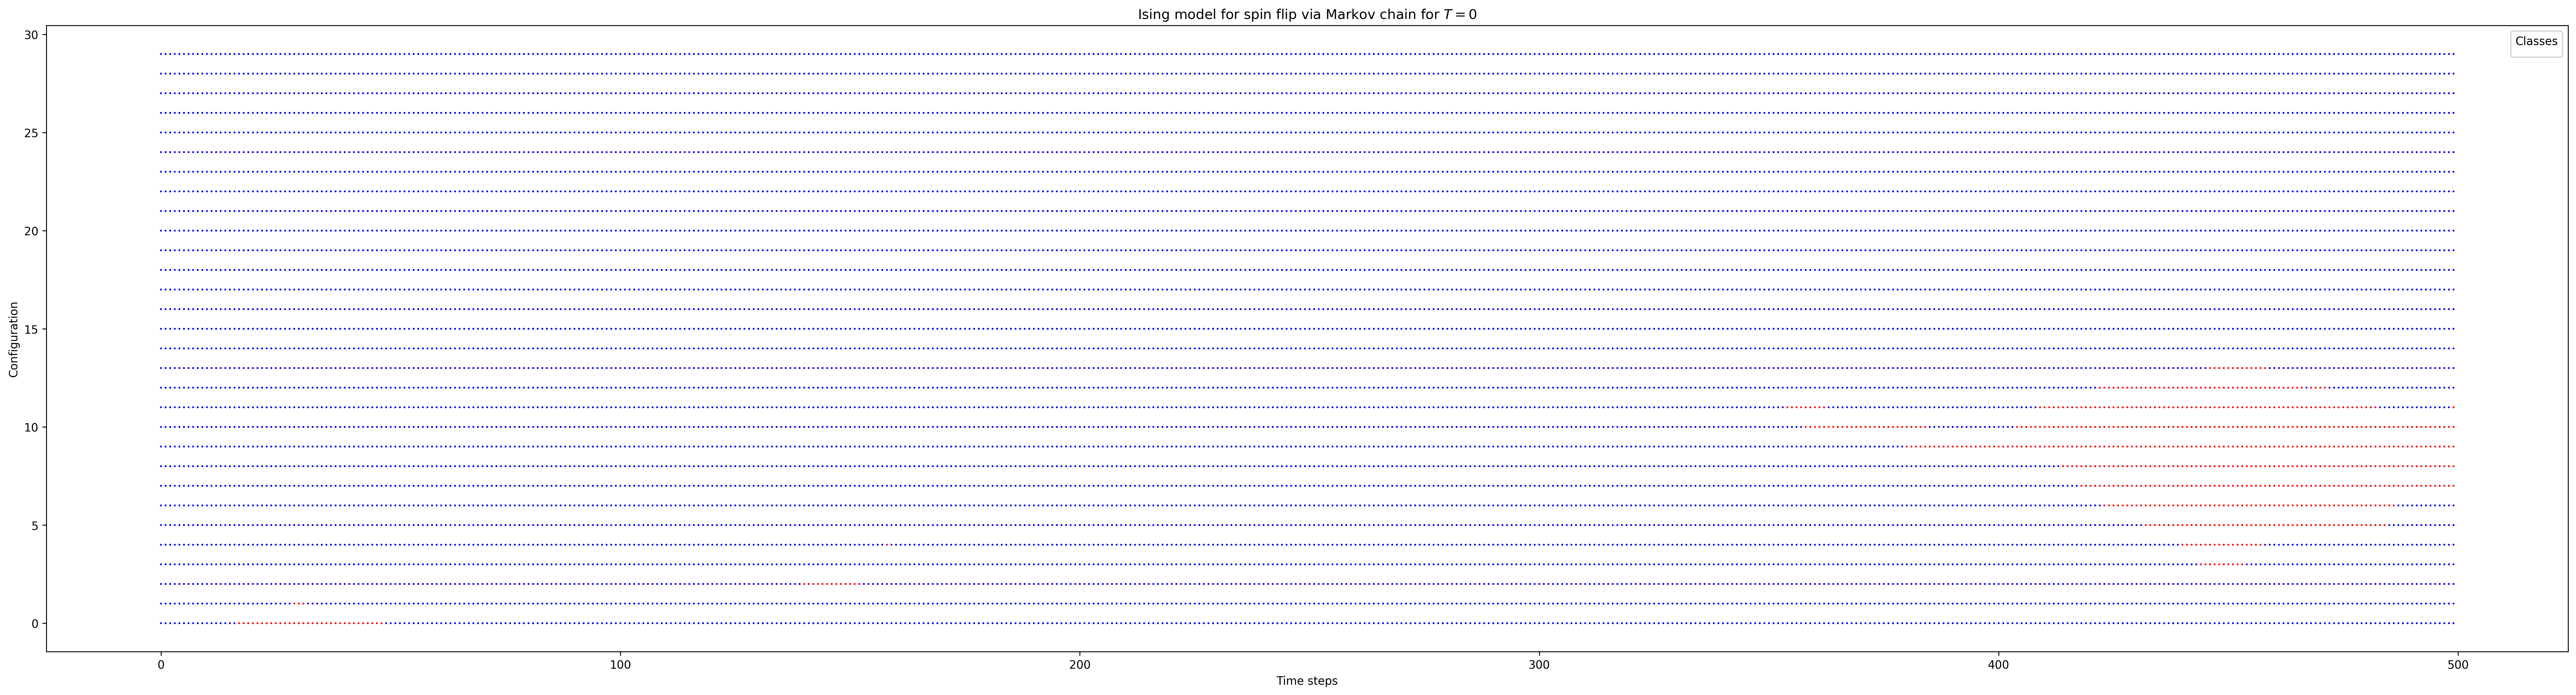

<Figure size 640x480 with 0 Axes>

In [26]:
def plot_time_evolution_1d_ising(states):
    fig, ax = plt.subplots(figsize=(40, 10), dpi=300)
    for t in range(n_trials):
        scatter = ax.scatter(t*np.ones(N), np.arange(N), marker= "o", s= 0.5, c = ["blue" if s==1 else "red"  for s in states[t]])
    plt.title("Ising model for spin flip via Markov chain for $T=0$")
    ax.set_ylabel("Configuration")
    ax.set_xlabel("Time steps")
    legend = ax.legend(*scatter.legend_elements(), title="Classes") #Todo: Fix legend
    ax.add_artist(legend)
    plt.show()

plot_time_evolution_1d_ising(states)
plt.savefig(f"Ising_spinflip.png", dpi = 500)

Repeat the same simulation for three different thermal energies $k_B T = 0.1, 1$ and $10$ and keep track of the energy $E$ at each trial spin flip. For a given configuration $X = {s_1, . . . , s_N }$, it is given by
$E = −J \sum_{i=1}^{N} s_{i} s_{i+1}$
with $s_{N+1} = s_{1}$ due to the periodic boundary condition. Note that we still assume $H = 0$ here, such that the terms involving the interaction with the external field are omitted here. First run the simulation for at least $L = 1000$ trial spin flips. Plot the time evolution of the energy for each temperature. Your result will be strongly fluctuating. Improve it by repeating each simulation $M = 100$ times, each time starting with a different random seed. Then plot the time evolution of the mean energy $⟨E⟩$ and its Monte Carlo error estimate $\sqrt{(⟨E^2⟩ − ⟨E⟩^2)/M}$. Discuss your result. When is equilibrium reached? What can you observe after the system has reached equilibrium? (4 points

C:\Users\corin\AppData\Local\Temp\ipykernel_10376\1611310802.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]


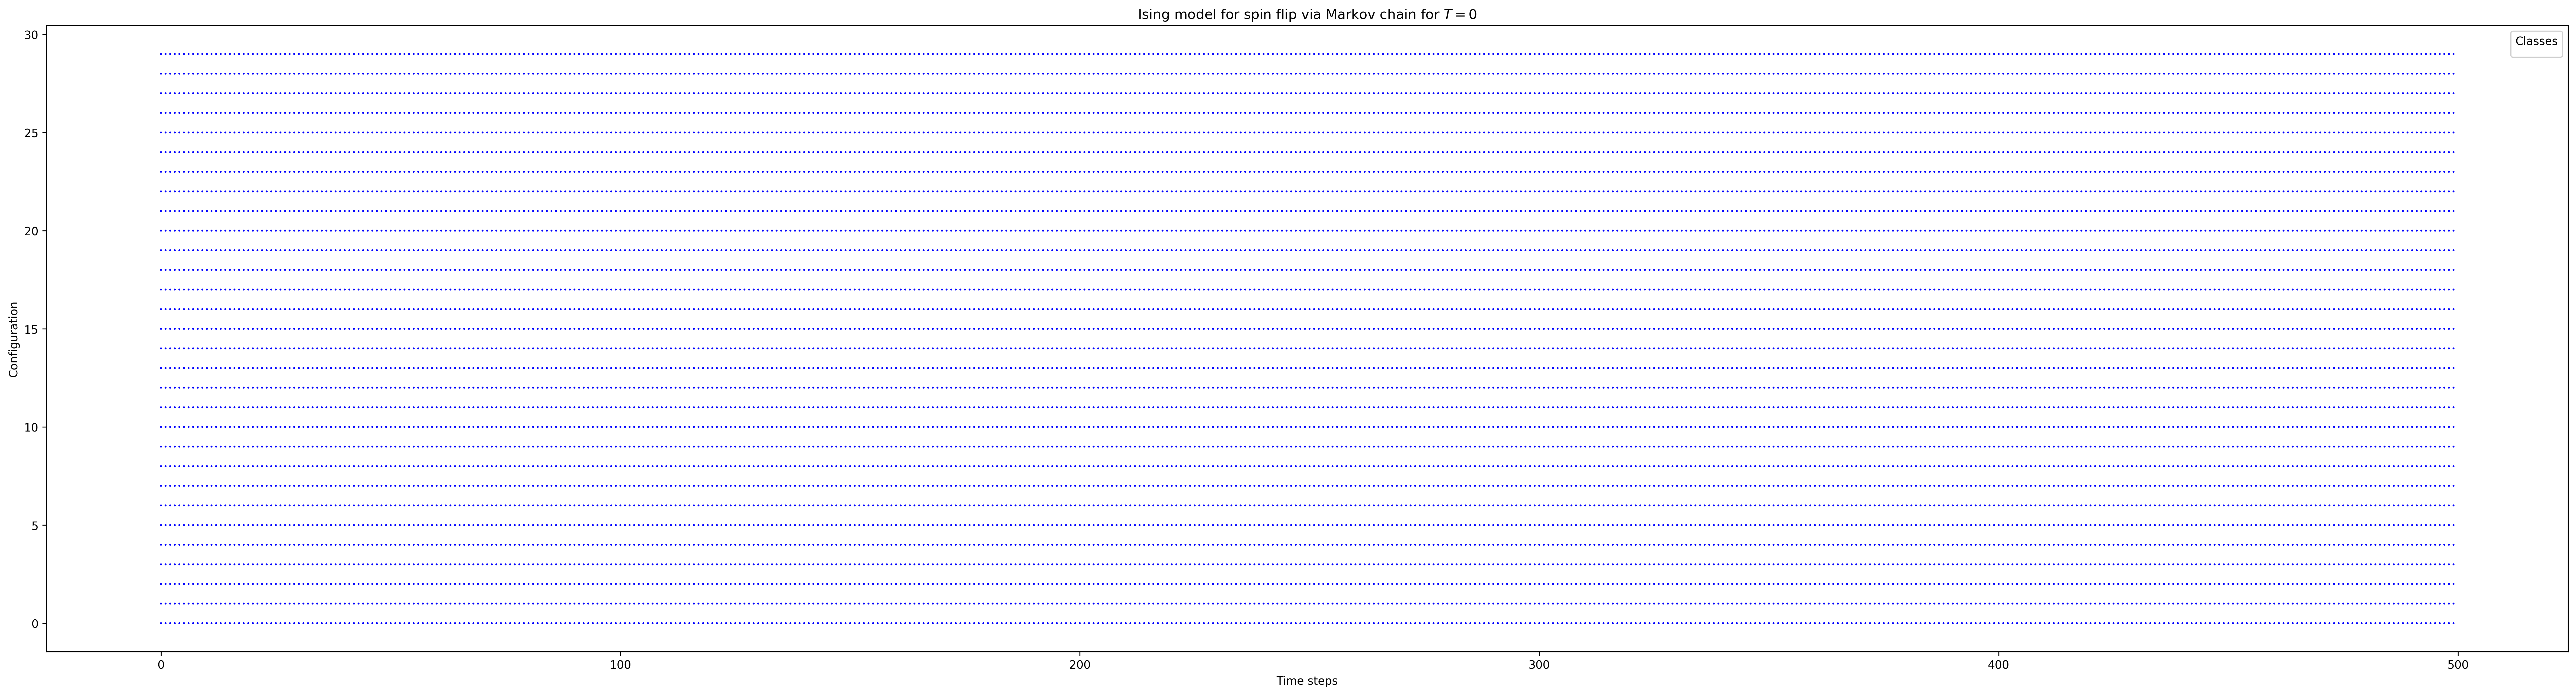

<Figure size 640x480 with 0 Axes>

In [32]:
#Getting beta from k_B*T:
list_beta = [10,1,0.1]

states_10, t10 = metropolis_algorithm(X_0, 1000, beta= list_beta[0], list_seeds=seeds[42])
list_energy_10 = np.array([energy(state) for state in states_10])
plot_time_evolution_1d_ising(states_10)
plt.savefig(f"Ising_spinflip_beta10.png", dpi = 500)

C:\Users\corin\AppData\Local\Temp\ipykernel_10376\2992646048.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]


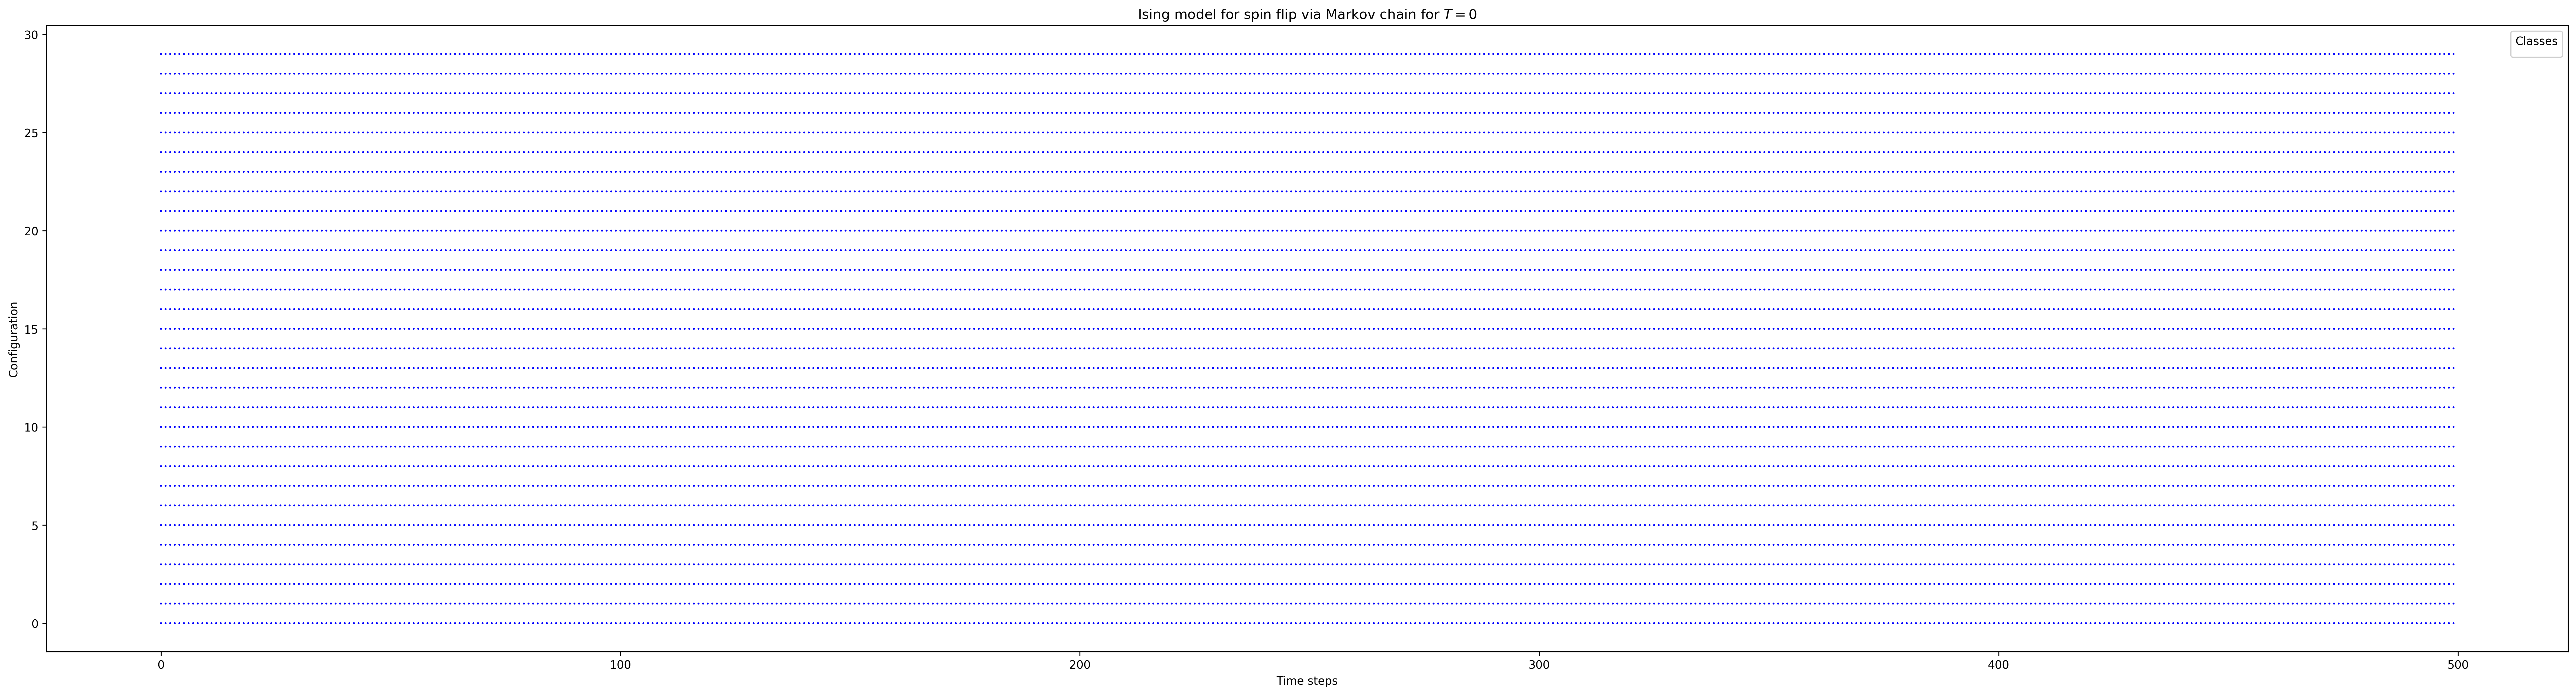

<Figure size 640x480 with 0 Axes>

In [7]:
states_1, t1 = metropolis_algorithm(X_0, 1000, beta= list_beta[1], list_seeds=seeds[42])
plot_time_evolution_1d_ising(states_1)
list_energy_1 = np.array([energy(state) for state in states_1])
plt.savefig(f"Ising_spinflip_beta1.png", dpi = 500)

C:\Users\corin\AppData\Local\Temp\ipykernel_10376\1611310802.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]


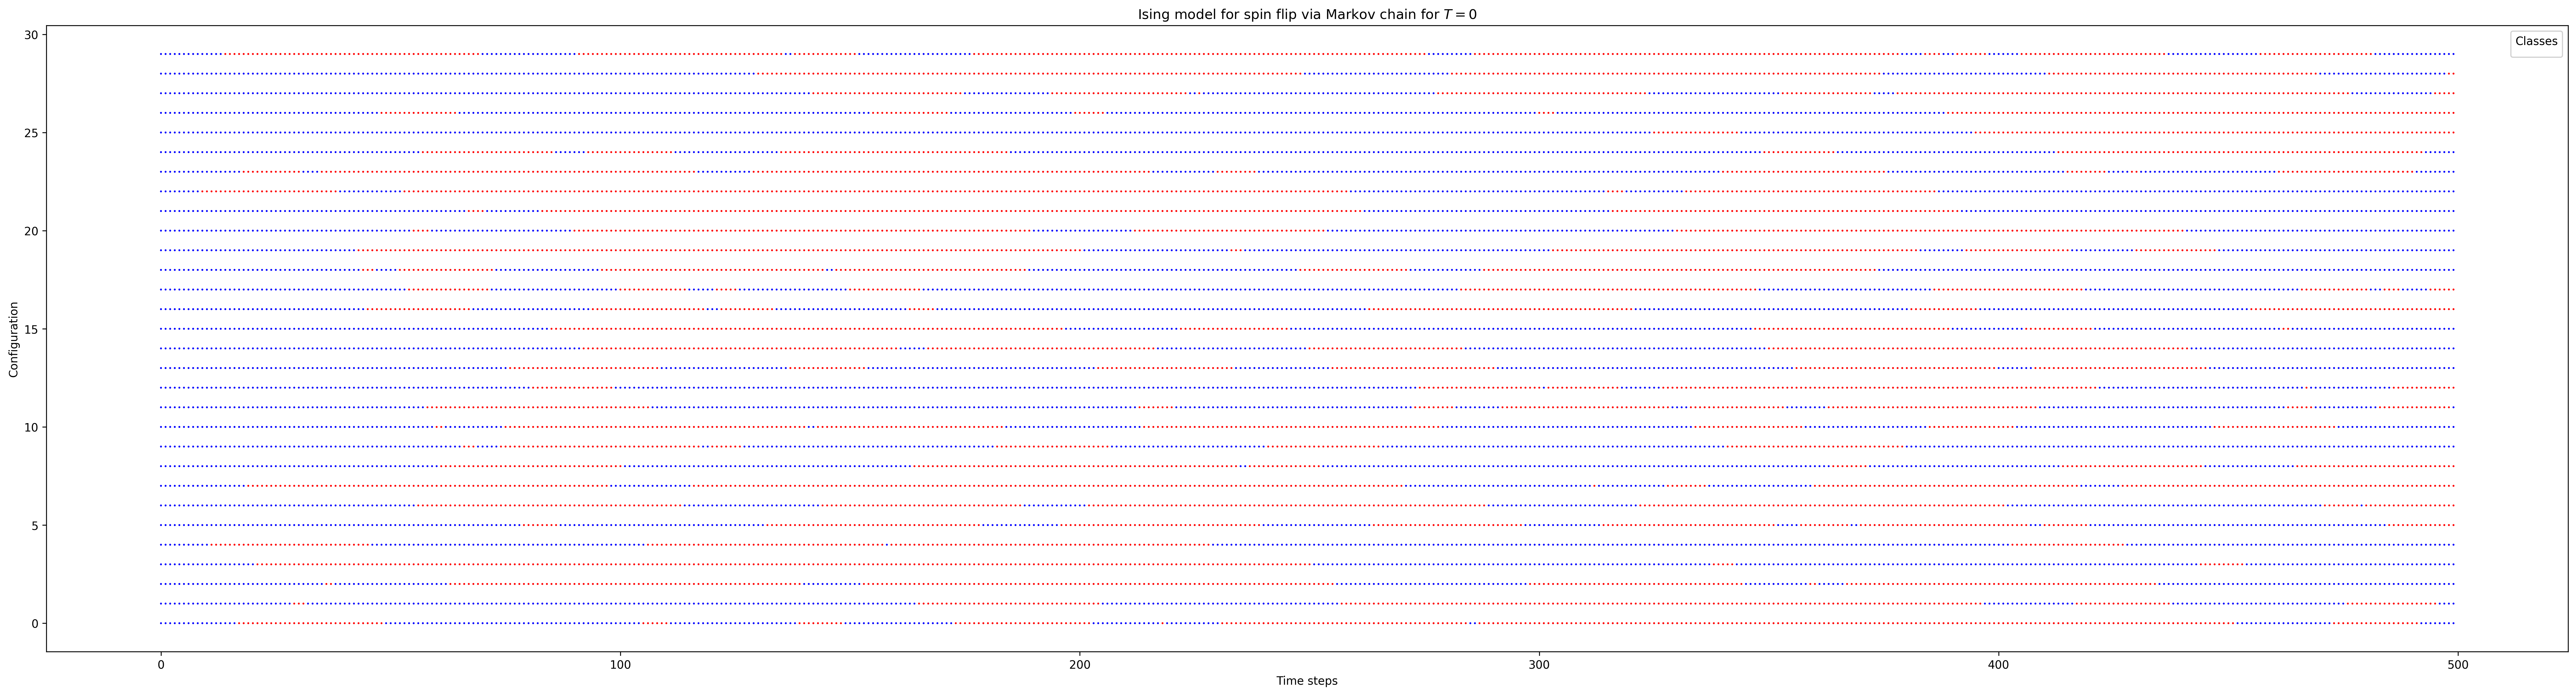

<Figure size 640x480 with 0 Axes>

In [39]:
states_2, t2 = metropolis_algorithm(X_0, 1000, beta= list_beta[2], list_seeds=seeds[0])
plot_time_evolution_1d_ising(states_2)
list_energy_2 = np.array([energy(state) for state in states_2])
plt.savefig(f"Ising_spinflip_beta2.png", dpi = 500) #beta = 0.1, kbT = 10

Text(0, 0.5, 'Energy')

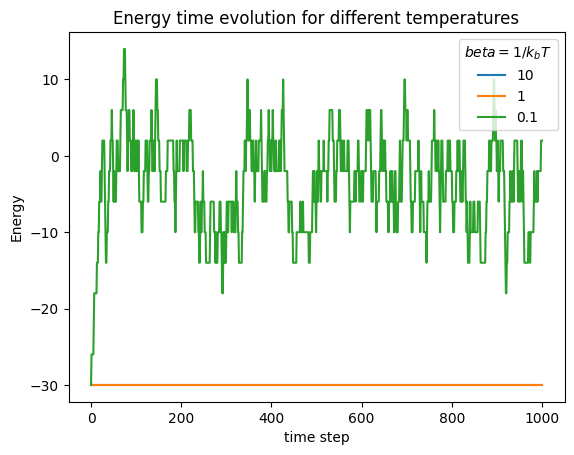

In [36]:
plt.plot(t10, list_energy_10, label="10")
plt.plot(t1, list_energy_1, label="1")
plt.plot(t2, list_energy_2, label="0.1")
plt.legend(title="$beta = 1/k_{b} T$")
plt.title("Energy time evolution for different temperatures")
plt.xlabel("time step")
plt.ylabel("Energy")

C:\Users\corin\AppData\Local\Temp\ipykernel_10376\2992646048.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]


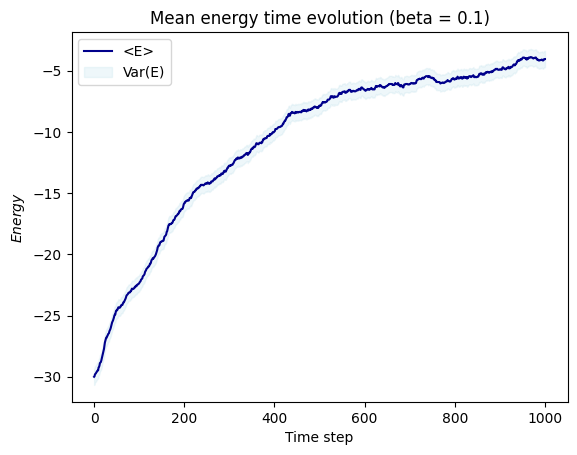

In [10]:
M = 100
list_energies = []
#list_errors = []

def mc_error(list_energy):
    E_mean = np.mean(list_energy)
    E_mean_squared = np.mean([E**2 for E in list_energy])
    return np.sqrt((E_mean_squared-E_mean**2)/M)

for m in range(M): #Todo: Add seeds
    states_m, _ = metropolis_algorithm(X_0, 1000, 0.1, list_seeds=seeds[m])
    energies_m = [energy(state) for state in states_m]
    errors_m = [mc_error(state) for state in states_m]
    list_energies.append(energies_m)
    #list_errors.append(errors_m)
    
list_energies = np.array(list_energies)
#list_errors = np.array(list_errors)
avg_energies = np.mean(list_energies, axis=0)
list_mc_errors = mc_error(avg_energies)
plt.plot(np.arange(1001), avg_energies, color="darkblue", label= "<E>") 
plt.fill_between(np.arange(1001), avg_energies - list_mc_errors, avg_energies + list_mc_errors,
                 color='lightblue', alpha=0.2, label="Var(E)")
plt.title("Mean energy time evolution (beta = 0.1)")
plt.xlabel("Time step")
plt.ylabel("$Energy$")
plt.legend()

Equilibrium will be reached when $<E> = 0$. Then, all spins are aligned antiparallel and there are no domains of spins left. After reaching equilibrium, there will be only random fluctuations which cancel out on average. Then the system will stay in equilibrium. 

Make a plot of the mean energy per particle $\frac{1}{N} ⟨E⟩_t$ (averaged over simulation time $t$, e.g. over $L = 1000$ trial spin flips) versus the thermal energy $k_{B}T$ after equilibrium has been reached (i.e. ignoring the first $L ∼ 1000$ trial spin flips). Choose $k_{B}T = 1 . . . 10$ and average over $M = 100$ independent simulations to obtain a smooth result. Compare to the analytical result for the thermodynamic limit and discuss your results. (4 points)


C:\Users\corin\AppData\Local\Temp\ipykernel_10376\1611310802.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  H = np.sum(config[i]*config[i+1] for i in range(len(config)-1)) + config[0]*config[-1]


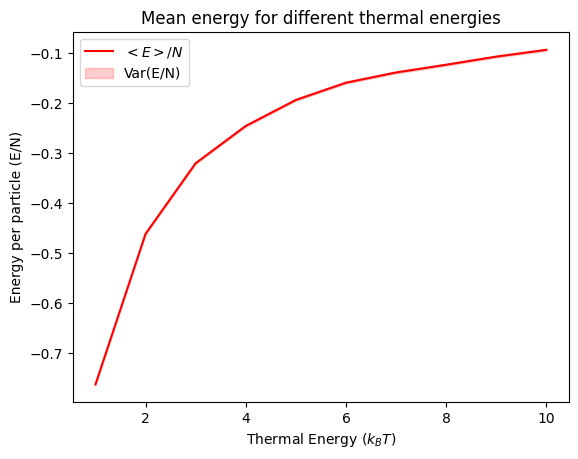

In [38]:
M = 100

def specific_heat(list_energy, beta):
    E_mean = np.mean(list_energy)
    E_squared_mean = np.mean([E**2 for E in list_energy])
    k_B = 1.380649 * 10**(-23)
    T = 1/(beta*k_B)
    return (E_squared_mean - E_mean**2)/(k_B*T**2)

list_beta = 1/np.arange(1, 11)

energies = {}
energy_errors = {}
cv = {}

for beta in list_beta:
    list_energies = []
    for m in range(M):
        states_m, _ = metropolis_algorithm(X_0, 2000, beta, list_seeds=seeds[m])
        states_m = states_m[-1000:,:] #Keep only the equilibrium states
        energies_m = [energy(state) for state in states_m]
        errors_m = [mc_error(state) for state in states_m]
        list_energies.append(energies_m)
    list_energies = np.array(list_energies)
    avg_energies = np.mean(list_energies, axis=0)/N
    E_mean = np.mean(avg_energies)
    list_cv = specific_heat(avg_energies, beta) 
    energies[beta] = E_mean
    energy_errors[beta] = mc_error(avg_energies)
    cv[beta] = list_cv
    
    
plt.plot(np.arange(1,11), list(energies.values()), "red", label = "$<E>/N$") 
plt.fill_between(np.arange(1,11), np.array(list(energies.values()))-np.array(list(energy_errors.values())), np.array(list(energies.values()))+np.array(list(energy_errors.values())), color='red', alpha=0.2, label="Var(E/N)")
plt.title("Mean energy for different thermal energies")
plt.xlabel("Thermal Energy ($k_{B}T$)")
plt.ylabel("Energy per particle (E/N)")
plt.legend()

Make a plot of the specific heat per particle at constant volume $c_{V} =\frac{1}{N} C_{V}$ versus the thermal energy $k_{B}T$ after equilibrium has been reached. Use the same parameters as in c).  Compare to the analytical result for the thermodynamic limit and discuss your results.

In [ ]:
plt.plot(1/np.array(list(cv.keys())), np.array(list(cv.values()))/N)
plt.title("Specific heat per particle for different thermal energies")
plt.xlabel("$k_{B}T$")
plt.ylabel("$c_{V} = C_{V}/N$")
# Todo: Plot theoretical plot along for comparison
# Todo: Mark 0.44 for theoretical?

Finally, make a plot of the magnetisation per particle $m =\frac{1}{N}⟨M⟩$ versus the thermal energy $k_{B}T$ after equilibrium has been reached. Use the same parameters as in c), but repeat your measurement for different external magnetic fields $H = 0, 0.1, 1$ and $10$. For a given configuration $X$, the magnetisation $M$ is given by $M = \sum_{i=1}^{N} s_{i}$. Compare to the analytical result for the thermodynamic limit and discuss your results.

In [ ]:
list_H = [0,0.1,1,10]
dict_M ={}

def magnetisation(config):
    return np.sum(config)

for H in list_H:
    list_M_H = []
    for beta in list_beta:
        list_M = []
        for m in range(M): #Todo: Add seeds
            states_m, _ = metropolis_algorithm(X_0, 2000, beta, H, seeds[m])
            states_m = states_m[-1000:,:] #Keep only the equilibrium states
            errors_m = [mc_error(state) for state in states_m]
            mag_m = [magnetisation(state for state in states_m)]
            list_M.append(mag_m)
        #list_mc_errors = mc_error(avg_energies)
        M_mean = np.mean(list_M)
        list_M_H.append(M_mean)
    dict_M[H] = list_M_H #contains all average magnetisations for all beta
        
for h in dict_M.keys():
    plt.plot(1/list_beta, np.array(dict_M[h])/N, label = h)
plt.title("Magnetisation per particle for different thermal energies")
plt.xlabel("Thermal energy $k_{B}T$")
plt.ylabel("Magnetisation $m = M/N$")
plt.legend(title = "H_external")
# Todo: Plot theoretical plot along for comparison